# CS 109A Data Science: AirBnB Pricing Predictions - Milestone #3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 5th, 2016 at 11:59pm

#### By Ayo Opeyemi, Chase Davis, & Dino Rodriguez

### Import Libaries:

In [119]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from collections import Counter
%matplotlib inline

### Step 1: Import listings, clean data, and extract features
<p> We begin by importing the data. A visual examination reveals missing values across several columns.</p>
* TODO: Clean data and fill in missing values
* TODO: Extract appropriate features

In [120]:
# Read in the data 
listings = pd.read_csv('listings.csv', delimiter=',')

# Visualize initial data
print 'Fig 1'
print ''
print listings.columns.values

Fig 1

['id' 'scrape_id' 'last_scraped' 'name' 'picture_url' 'host_id' 'host_name'
 'host_since' 'host_picture_url' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'city' 'state' 'zipcode' 'market' 'country'
 'latitude' 'longitude' 'is_location_exact' 'property_type' 'room_type'
 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'guests_included' 'extra_people'
 'minimum_nights' 'maximum_nights' 'calendar_updated' 'availability_30'
 'availability_60' 'availability_90' 'availability_365'
 'calendar_last_scraped' 'number_of_reviews' 'first_review' 'last_review'
 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'host_listing_count']


In [121]:
# Visualize list to get an idea of data types we have
print 'Fig 2'
print ''
listings.head(n = 3)

Fig 2



,id,scrape_id,last_scraped,name,picture_url,host_id,host_name,host_since,host_picture_url,street,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,1069266,2.015010e+13,1/2/15,Stay like a real New Yorker!,https://a0.muscache.com/pictures/50276484/larg...,5867023,Michael,4/10/13,https://a2.muscache.com/ic/users/5867023/profi...,"East 53rd Street, New York, NY 10022, United S...",...,4/28/13,12/17/14,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,1846722,2.015010e+13,1/2/15,Apartment 20 Minutes Times Square,https://a1.muscache.com/pictures/35865039/larg...,2631556,Denise,6/13/12,https://a2.muscache.com/ic/users/2631556/profi...,"West 155th Street, New York, NY, United States",...,1/5/14,12/29/14,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,2061725,2.015010e+13,1/2/15,Option of 2 Beds w Private Bathroom,https://a2.muscache.com/pictures/50650147/larg...,4601412,Miao,1/5/13,https://a0.muscache.com/ic/users/4601412/profi...,"Van Buren Street, Brooklyn, NY 11221, United S...",...,2/4/14,12/29/14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4


### Step 2: Explore Data

In [122]:
# Visualize price table, changing them to floats and replacing the commas with a blank
prices = listings['price'].apply(lambda s: float(s[1:].replace(',','')))

print 'Fig 3'
print ''
print prices.shape
prices.head(n = 5)

Fig 3

(27392,)


0    160.0
1    105.0
2     58.0
3    185.0
4    195.0
Name: price, dtype: float64

In [123]:
# Histogram of pricing data
def price_hist(n, titles, ranges):
    fig, ax = plt.subplots(n, figsize=(8, 7.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 60, normed=1, facecolor='green', alpha=0.75)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Value")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Fig 4, 5, 6



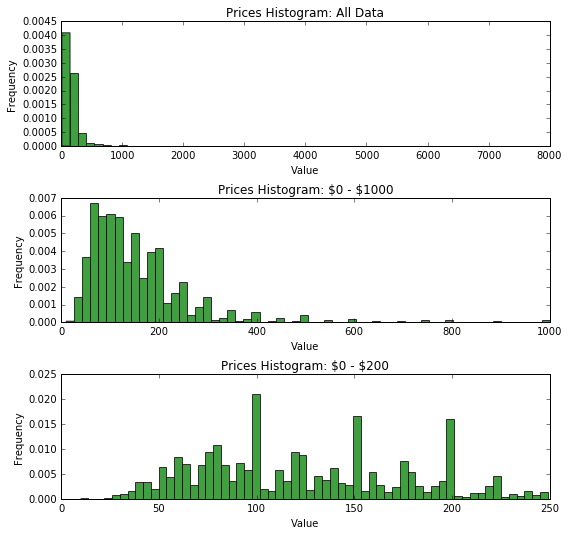

In [124]:
print 'Fig 4, 5, 6'
print ''
price_hist(3, ['Prices Histogram: All Data', 'Prices Histogram: \$0 - \$1000', 'Prices Histogram: \$0 - \$200'], 
           [prices, prices[prices <= 1000], prices[prices < 250]])

Figure 7

Number of Neighborhoods:  186


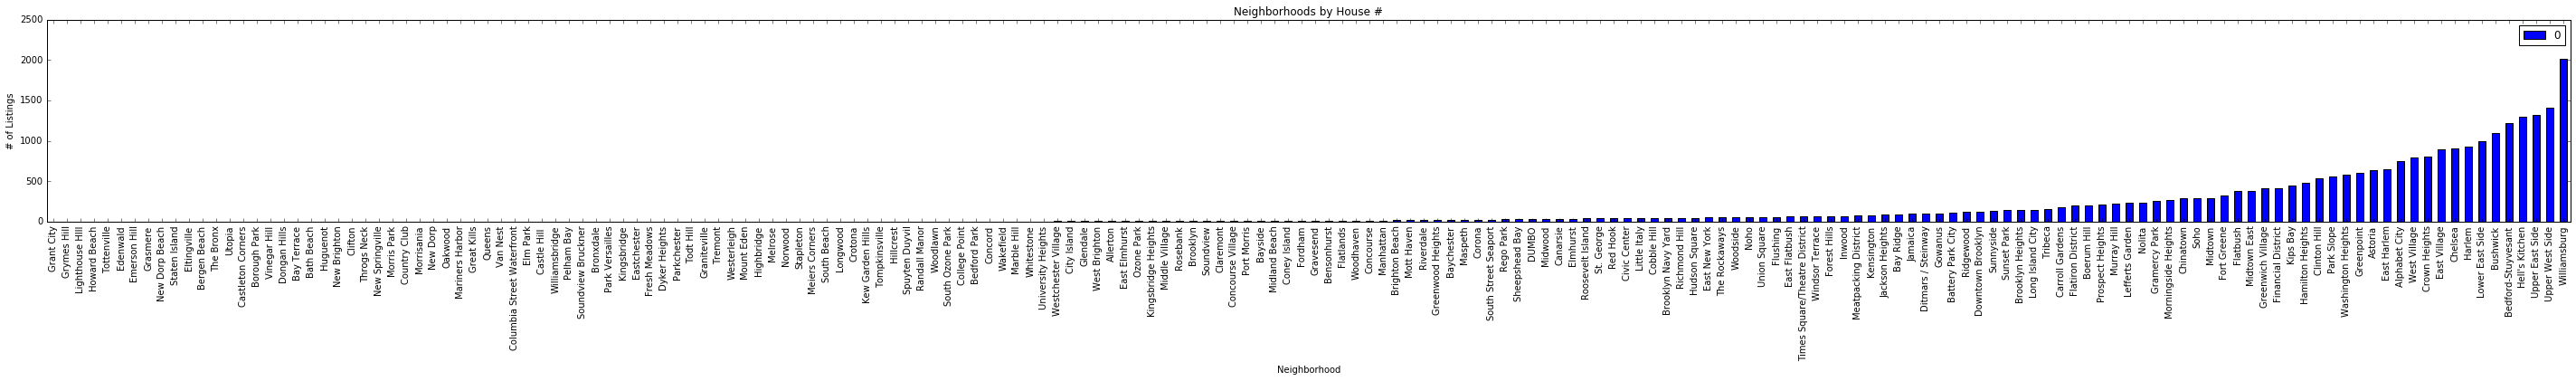

In [125]:
# Variation of method at https://www.mapr.com/blog/predicting-airbnb-listing-prices-scikit-learn-and-apache-spark

nb_counts = Counter(listings.neighbourhood_cleansed)

print 'Figure 7'
print ''
print 'Number of Neighborhoods: ', len(nb_counts)

tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (50,4))
ax.set_title("Neighborhoods by House #")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

##### Double click the above plot to view suppressed output!

Figure 8

Number of Neighborhoods:  48


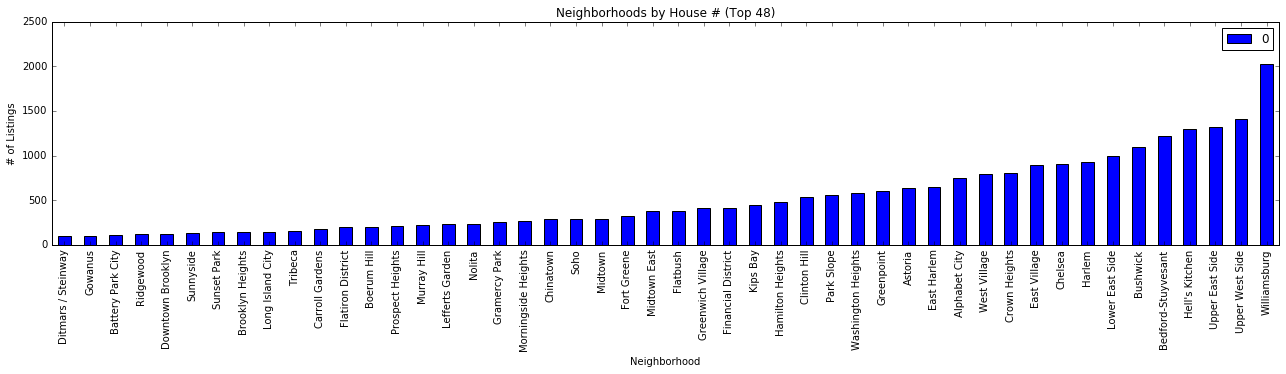

In [126]:
nb_counts = Counter(listings.neighbourhood_cleansed)

for frequency in nb_counts.keys():  ## creates a list of all keys
    if nb_counts[frequency] < 100:
        del nb_counts[frequency]

print 'Figure 8'
print ''       
print 'Number of Neighborhoods: ', len(nb_counts)

tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (22,4))
ax.set_title("Neighborhoods by House # (Top 48)")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

Figure 8



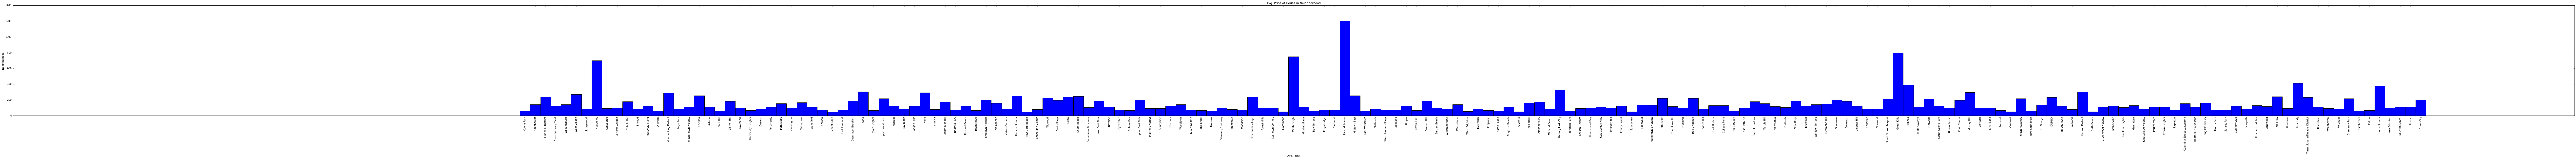

In [128]:
listings['price'] = listings["price"].apply(lambda s:float(s[1:].replace(',','')))

neighborhoods = list(set(listings['neighbourhood_cleansed'].tolist()))
p = []
for nb in neighborhoods:
    p.append(np.mean(listings[listings['neighbourhood_cleansed'] == nb]['price'].tolist()))

data = zip(p, neighborhoods)

print 'Figure 8'
print '' 

plt.figure(figsize=(186, 8))
ax = plt.bar(np.arange(len(p)), p, align='center', width = 1)
plt.xticks(np.arange(len(p)), neighborhoods, rotation = 90)
plt.title("Avg. Price of House in Neighborhood")
plt.xlabel("Avg. Price")
plt.ylabel("Neighborhood")
# for price, neighborhood in zip(prices, neighborhoods):
#     ax.text(rect.get_x() + rect.get_width()/2, price, neighborhood, ha='center', va='bottom')
plt.show()

##### Double click the above plot to view suppressed output!

Figure 9



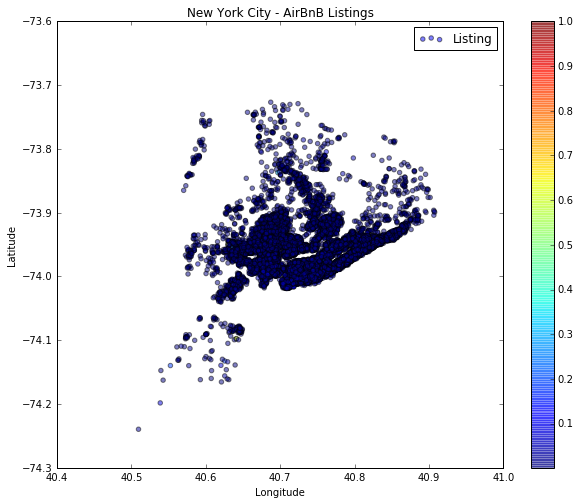

In [135]:
price = listings['price'].tolist()
price_sum = sum(price)
price_max = max(price)
norm = [float(i)/price_sum for i in price]
norm = [float(i)/max(norm) for i in norm]

print 'Figure 9'
print ''

# Plot listings on scatter
plt.figure(figsize=(10, 8))
plt.scatter(listings['latitude'], listings['longitude'], alpha = .5, c = norm, label = 'Listing') #plot x against y
plt.title('New York City - AirBnB Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'best')

plt.colorbar()
plt.show()

In [136]:
print 'Figure 10'
print ''

correlation_matrix = listings[['price','latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet','guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'host_listing_count']].corr()

correlation_matrix

Figure 10



,price,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
price,1.000000,0.033857,-0.192456,0.363898,0.299272,0.361118,0.267980,0.320454,0.133200,-0.030793,...,0.038807,-0.068527,0.085971,0.066175,0.072593,0.035766,0.041895,0.193264,0.014833,-0.049985
latitude,0.033857,1.000000,0.133553,-0.032811,-0.055065,-0.075870,-0.047631,-0.094961,-0.031030,0.000331,...,-0.047200,0.013504,-0.005007,-0.003177,-0.011880,-0.016603,-0.008851,0.053824,0.000309,-0.069172
longitude,-0.192456,0.133553,1.000000,-0.020413,-0.003932,0.007098,0.020381,-0.060729,-0.005703,-0.028357,...,0.088096,-0.012708,-0.040922,-0.015625,0.003481,-0.011397,-0.033447,-0.326250,-0.009386,0.075559
accommodates,0.363898,-0.032811,-0.020413,1.000000,0.355620,0.610036,0.782621,0.365819,0.480174,-0.026468,...,0.025231,0.046031,-0.080041,-0.069797,-0.028517,-0.065810,-0.069592,-0.091146,-0.070620,0.169943
bathrooms,0.299272,-0.055065,-0.003932,0.355620,1.000000,0.418324,0.394211,0.305206,0.181934,0.004823,...,0.016331,-0.042859,-0.002848,-0.023873,-0.010532,-0.016592,-0.029369,-0.027910,-0.006688,0.116552
bedrooms,0.361118,-0.075870,0.007098,0.610036,0.418324,1.000000,0.568089,0.428187,0.384521,0.016289,...,0.025359,0.005053,-0.026578,-0.039936,-0.006670,-0.021357,-0.041041,-0.060205,-0.020040,0.051051
beds,0.267980,-0.047631,0.020381,0.782621,0.394211,0.568089,1.000000,0.316329,0.374585,-0.008022,...,0.047194,0.022172,-0.098200,-0.101608,-0.056004,-0.065198,-0.075602,-0.103108,-0.077354,0.259509
square_feet,0.320454,-0.094961,-0.060729,0.365819,0.305206,0.428187,0.316329,1.000000,0.267987,0.011696,...,0.049838,-0.035374,0.062746,0.033442,0.012108,0.039967,-0.029054,0.082576,0.049834,0.011081
guests_included,0.133200,-0.031030,-0.005703,0.480174,0.181934,0.384521,0.374585,0.267987,1.000000,0.011201,...,0.040299,0.100829,-0.016153,-0.007967,0.020075,-0.008419,-0.009294,-0.042219,-0.027134,0.059949
minimum_nights,-0.030793,0.000331,-0.028357,-0.026468,0.004823,0.016289,-0.008022,0.011696,0.011201,1.000000,...,-0.078372,-0.054506,0.028904,0.016069,0.005419,0.002577,0.002046,0.022389,0.011099,-0.018096


Figure 11



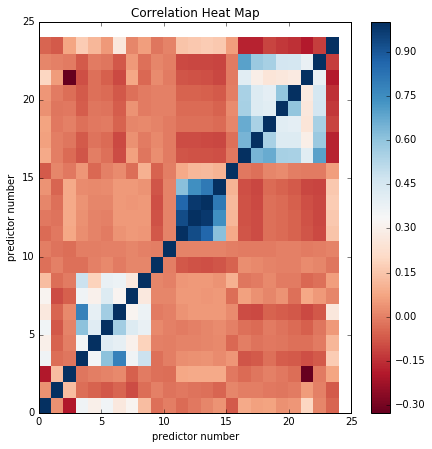

In [137]:
print 'Figure 11.1'
print ''

plt.figure(figsize=(7, 7))

plt.pcolor(correlation_matrix, cmap="RdBu")
plt.xlabel("predictor number")
plt.ylabel("predictor number")
plt.title("Correlation Heat Map")
plt.colorbar()

plt.show()

In [139]:
print 'Figure 11.2'
print ''

key = pd.DataFrame({"Predictor Number": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
                                         16,17,18,19,20,21,22,23], "Name": ['price','latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet','guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'host_listing_count']})
key = key[["Predictor Number","Name"]]

key

Figure 11.2



,Predictor Number,Name
0,0,price
1,1,latitude
2,2,longitude
3,3,accommodates
4,4,bathrooms
5,5,bedrooms
6,6,beds
7,7,square_feet
8,8,guests_included
9,9,minimum_nights
